<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/AnalyticsAndML/ProbablityAndStatistics/LIVE_Probability_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Few references:
  - Book: https://greenteapress.com/thinkstats/
  - Examples + Exercises: https://github.com/AllenDowney/ThinkStats2
  - http://www.allendowney.com/wp/



### QQ-Plot

In [0]:
import numpy as np
import scipy as sp

x = np.random.normal(loc = 20, scale = 5, size=100)
sp.stats.probplot(x, dist="norm", plot=matplotlib.pyplot)



AttributeError: ignored

In [0]:
import numpy as np
from scipy import stats

x = np.random.normal(loc = 20, scale = 5, size=100)
stats.probplot(x, dist="norm", plot=matplotlib.pyplot)

NameError: ignored

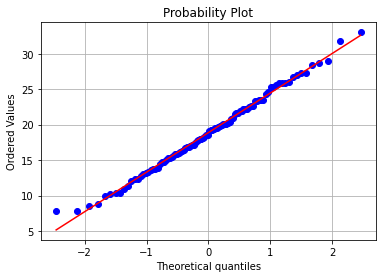

In [0]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.random.normal(loc = 20, scale = 5, size=100)
stats.probplot(x, dist="norm", plot=plt)
plt.grid()

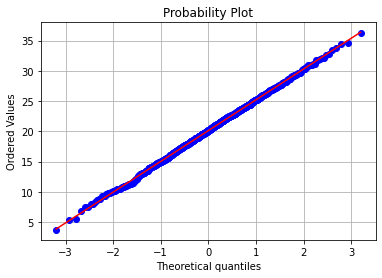

In [0]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.random.normal(loc = 20, scale = 5, size=1000)
stats.probplot(x, dist="norm", plot=plt)
plt.grid()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


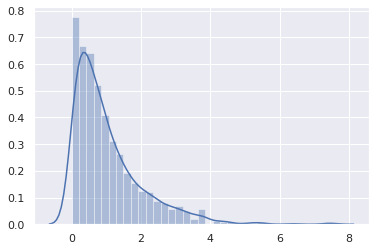

In [0]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ref: #https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html
# real-world example: "The time it takes before your next telephone call" ---Wiki [https://en.wikipedia.org/wiki/Exponential_distribution#Occurrence_and_applications]
x = np.random.exponential(scale=1.0, size=1000) # scale a.k.a lambda on wiki [https://en.wikipedia.org/wiki/Exponential_distribution]

# plot PDF(X)

sns.set()
ax = sns.distplot(x)
plt.show()


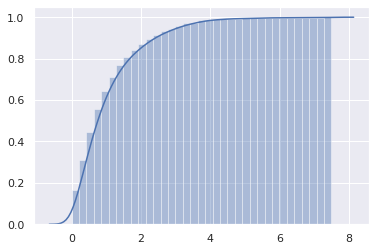

In [0]:
# plot CDF(X)
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)


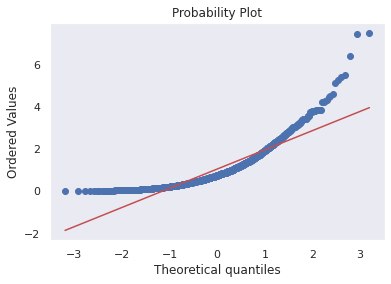

In [0]:
#QQ-Plot

stats.probplot(x, dist="norm", plot=plt)
plt.grid()

### Box-cox Transform

0.27068802114710405


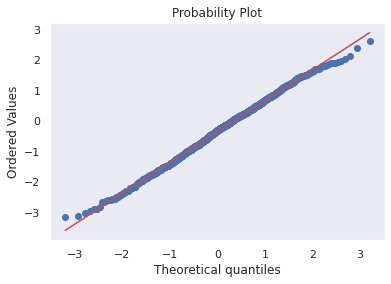

In [0]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
x_t, l = stats.boxcox(x) # l=lambda, x_t =x tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

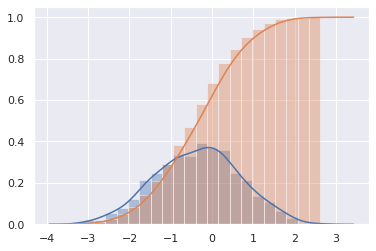

In [0]:
# PDF of x_t
sns.set()
sns.distplot(x_t)

#CDF of x_t
kwargs = {'cumulative': True}
sns.distplot(x_t, hist_kws=kwargs, kde_kws=kwargs)

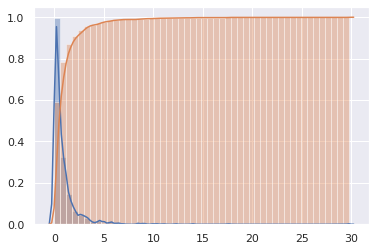

In [0]:
# Pareto distributed data
# https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.pareto.html
x = np.random.pareto(a=2.0, size=1000) 

# PDF of x
sns.set()
ax = sns.distplot(x)

#CDF of x
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)


0.13651744696716228


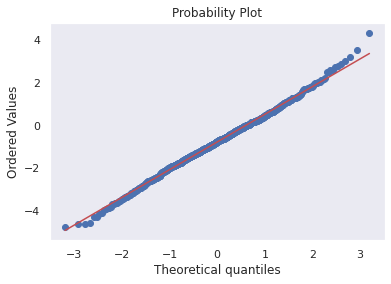

In [0]:
#Box-cox
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
x_t, l = stats.boxcox(x) # l=lambda, x_t =x tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

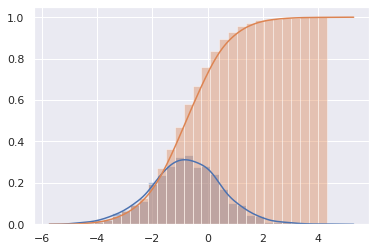

In [0]:
# PDF of x_t
sns.set()
ax = sns.distplot(x_t)

#CDF of x_t
kwargs = {'cumulative': True}
sns.distplot(x_t, hist_kws=kwargs, kde_kws=kwargs)

### Bootstrapping
- Non-parametric Stats + Computational-Simulations
- CLT: Sample means are Gaussian distributed with mean=population-mean.
- Q. How to estimate the population median (or other statistics) given a single sample (S)?
- Ans: Bootstrapping
- Assmumption: Each observed value in the sample (S) is randomly collected and are independent.




In [0]:
# Bootstrapping diagram



In [0]:
# Synthetically create a sample with random and independent observations

# Let us use a sample of synthetic data (from some disb) 
# we generated so that we know the population medain to compare against
# Let sample from Beta disb with alpha = 2,beta=2 which has a population median of 0.5
# Refer: https://en.wikipedia.org/wiki/Beta_distribution Median ~ (alpha-1/3)/(alpha+beta-2/3) if alpaha, beta >1

n=100;
S = np.random.beta(2,2,n) # data can have any distribution.

#Q. Given S, how to estimate the popualtion median?

# function to generate a bootstrap(sampling with repalcement) sample of size n given a sample S. Each sample 
def bootstrapSample(S, m):

  n = S.size; # size of S
  indx = np.random.randint(n, size=m) # generates random integer indices from discrete unif random disb
  r = S[indx]
  return r


m = 50; # size of each bootstap sample
k = 1000; # number of botostrap samples

medians = np.zeros(k)

for i in range(k):
  medians[i] = np.median(bootstrapSample(S, m))

print(medians.size)

1000


In [0]:
# Now estimate median
print(np.mean(medians))

0.4585345416514776


In [0]:
print(np.median(medians))

0.4660887318771574


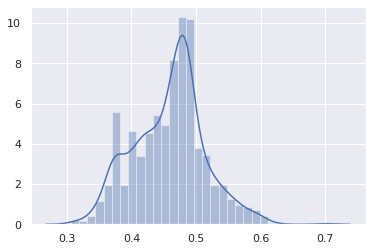

In [0]:
sns.set()
ax = sns.distplot(medians)


In [0]:
# 95% C.I on the medain estimate with n=100, m=50, k=1000

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html
lb_M = np.percentile(medians,2.5)
ub_M = np.percentile(medians,97.5)
mid_M = np.percentile(medians,50)

print(lb_M, mid_M, ub_M)

0.37378019891250347 0.4660887318771574 0.5424756696350534


In [0]:
# same experiment as above with same S, n=100, m=100, k=1000

n=100
m=100 # size of each bootstap sample
k=1000  # number of botostrap samples

medians = np.zeros(k)

for i in range(k):
  medians[i] = np.median(bootstrapSample(S, m))

print(medians.size)

lb_M = np.percentile(medians,2.5)
ub_M = np.percentile(medians,97.5)
mid_M = np.percentile(medians,50)

print(lb_M, mid_M, ub_M)

1000
0.37412150290076174 0.4679229480896182 0.5424606326849848


In [0]:
# same experiment as above with same S, n=100, m=200, k=1000

n=100
m=200 # size of each bootstap sample
k=1000  # number of botostrap samples

medians = np.zeros(k)

for i in range(k):
  medians[i] = np.median(bootstrapSample(S, m))

print(medians.size)

lb_M = np.percentile(medians,2.5)
ub_M = np.percentile(medians,97.5)
mid_M = np.percentile(medians,50)

print(lb_M, mid_M, ub_M)

1000
0.4062452196854919 0.4679229480896182 0.515828081425096


Exercise: Estimate 10th percentile value of the population given a sample of 100 points from any distribution.

### Permutation tests + Resampling
- let's do it line by line as per the algorithm explained in the course videos.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.06624816891345076


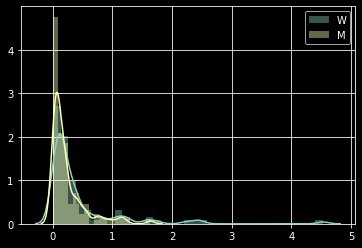

In [1]:
# Two sets of observations: Prices of prodcuts bought by men and women
# Again, let us use synthetic data so that we know if there is actually a differnce in population of Women and Men.

# Spends are pareto disb. Few people spend lots of money and most spend a smlla amount of money.
# Refer: https://en.wikipedia.org/wiki/Pareto_distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

n=100; # sample size

np.random.seed(100)
#observed samples
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.0,size=n)

# observed value of | W_Median-M_Median | 
obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))
print(obs)

plt.style.use('dark_background')

sns.distplot(PW,label="W")
sns.distplot(PM, label="M")
plt.grid()
plt.legend()
plt.show()


# Now, from the way we generated the data, we know that W and M populations are slightly differnt 



<function matplotlib.pyplot.show>

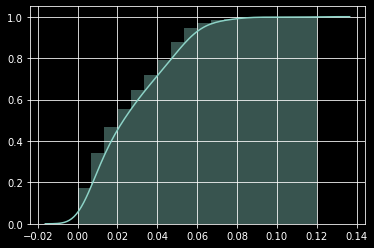

In [0]:
# Test-Statistic = abs(W_M - M_M)
# W_M : Median spend by women.
# M_M : Median spend by men.


# H0: Women and men spend the same amount


# P = Concatenate(PM, PW)
P = np.concatenate((PM,PW)) # tuple of arrays as param. Common mistake

k=1000 # number of resamplings
testStats = np.zeros(k)

for i in range(k):
  # resampling: split P into two random halves and tag hald as men and the rest as women.
  # Refer: https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
  np.random.shuffle(P)
  tmp_men, tmp_women = P[:n], P[n:]

  # Compute test-statistic
  testStats[i] = abs(np.percentile(tmp_women,50) - np.percentile(tmp_men,50))

#CDF of testStats
kwargs = {'cumulative': True}
sns.distplot(testStats, hist_kws=kwargs, kde_kws=kwargs, )
plt.grid()
plt.show

In [0]:
# Hypothesis testing: P(testStat > Obs | H0 ) can be estimated from testStats.

obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))
print(obs)

num_h0 = np.sum(testStats >=  obs)
prob = num_h0/k
print(prob)

# if Prob(testStat >= Obs | H0) < 0.05 
# then, it is very unlikely to observe the observed-difference and hence we reject H0
# else we accept H0


0.06624816891345076
0.036


In [0]:
# Let us write a function for this
def hypTestMedian(PW,PM):

  # observed value of W_Median-M_Median
  obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))

  # H0: Women and men spend the same amount


  # P = Concatenate(PM, PW)
  P = np.concatenate((PM,PW)) # tuple of arrays as param. Common mistake

  k=1000 # number of resamplings
  testStats = np.zeros(k)

  for i in range(k):
    # resampling: split P into two random halves and tag hald as men and the rest as women.
    # Refer: https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
    np.random.shuffle(P)
    tmp_men, tmp_women = P[:n], P[n:]

    # Compute test-statistic
    testStats[i] = abs(np.percentile(tmp_women,50) - np.percentile(tmp_men,50))

  # Hypothesis testing: P(testStat > Obs | H0 ) can be estimated from testStats.


  num_h0 = np.sum(testStats >=  obs)
  prob = num_h0/k
  return prob

In [0]:
#1.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.0,size=n)
print(hypTestMedian(PW,PM))

0.036


In [0]:
#2.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=3.0,size=n)
print(hypTestMedian(PW,PM))

0.0


In [0]:
#3.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=5.0,size=n)
print(hypTestMedian(PW,PM))

0.343


In [0]:
#3.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.5,size=n)
print(hypTestMedian(PW,PM))

0.162


### KS-Test
We can do KS-Test to compare the distribution of PM and PW as follows.
- KS-Test uses the supremum of the gap between the distirbutions as the test-statistic.
- It also uses KS-distirbution to arrive at the probability-values.
- Permutaion+Resampling is completely non-parametric.

In [0]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html
from scipy import stats

#1
n=100; # sample size
np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.0,size=n)

D,p = stats.ks_2samp(PW, PM)
print(D,p)

0.19 0.05390207893129876


### Measuring Causality
- Correlation does NOT imply causation
- Why is causation important? 
- Scientific/Medical experiments
- Randomized control trails aka A/B tests aka Bucket-Testing.
- Course videos on A/B Testing 

<img src="https://i.imgur.com/0dq0xKz.png" width="700"/>





### Concurrent A/B Tests
- What if Amazon wants to conduct 100 experiments at the same time?

<img src="https://i.imgur.com/9lOsmyY.png" width="700"/>
